# Demonstrations of the mngs.dsp Module
mngs.dsp module is designed to simplify the process of digital signal processing in Python. Implemented functions are capable of handling both NumPy and PyTorch arrays, with straightforward integration of GPU calculations.

In [1]:
!pip uninstall mngs -y
!pip install -U git+https://github.com/ywatanabe1989/mngs.git@develop

Found existing installation: mngs 1.1.1
Uninstalling mngs-1.1.1:
  Successfully uninstalled mngs-1.1.1
  Cloning https://github.com/ywatanabe1989/mngs.git (to revision develop) to /tmp/pip-req-build-2ok7k9a_
  Running command git clone --filter=blob:none --quiet https://github.com/ywatanabe1989/mngs.git /tmp/pip-req-build-2ok7k9a_
  Running command git checkout -b develop --track origin/develop
  Switched to a new branch 'develop'
  Branch 'develop' set up to track remote branch 'develop' from 'origin'.
  Resolved https://github.com/ywatanabe1989/mngs.git to commit be1abb6ae34b4e53ab47920e0b8b572d4b1f29b3
  Preparing metadata (setup.py) ... done
  Created wheel for mngs: filename=mngs-1.1.1-py3-none-any.whl size=202398 sha256=08cfe9139c9ad7c4a45efe59b8a7911b114134c251007c0a94c0b7d3252bcc91
  Stored in directory: /tmp/pip-ephem-wheel-cache-bptcmeah/wheels/49/4c/15/fc1d6d08297c40d7b2da5e5161b7d8f14cb99bfb8a897ad685
Successfully built mngs


In [2]:
import mngs
import matplotlib.pyplot as plt
plt, CC = mngs.plt.configure_mpl(plt, fig_scale=5)


----------------------------------------
Matplotlib has been configured as follows:

Figure DPI (Display): 100 DPI
Figure DPI (Save): 300 DPI
Figure Size (Not the Axis Size): 800.0 x 500.0 mm (width x height)
Font Size (Title): 8 pt
Font Size (X/Y Label): 8 pt
Font Size (Tick Label): 7 pt
Font Size (Legend): 6 pt
Hide Top and Right Axes: True
Custom Colors (RGBA):
  blue: (0, 128, 192, 0.75)
  red: (255, 70, 50, 0.75)
  pink: (255, 150, 200, 0.75)
  green: (20, 180, 20, 0.75)
  yellow: (230, 160, 20, 0.75)
  grey: (128, 128, 128, 0.75)
  purple: (200, 50, 255, 0.75)
  lightblue: (20, 200, 200, 0.75)
  brown: (128, 0, 0, 0.75)
  darkblue: (0, 0, 100, 0.75)
  orange: (228, 94, 50, 0.75)
  white: (255, 255, 255, 0.75)
  black: (0, 0, 0, 0.75)
----------------------------------------


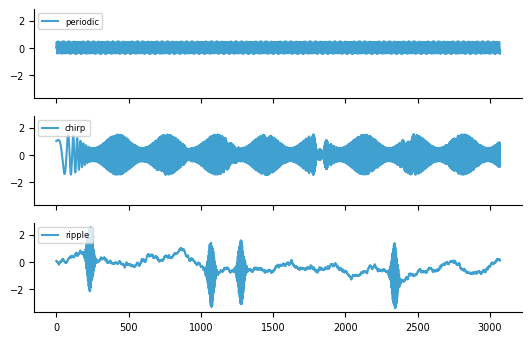

In [3]:
# Demo Signals
BATCH_SIZE = 8
N_CHS = 19
T_SEC = 3
FS = 1024
FREQS_HZ = [30, 100, 300]
TYPES = ["periodic", "chirp", "ripple"]

# Plots
xs = {type: mngs.dsp.demo_sig(batch_size=BATCH_SIZE, n_chs=N_CHS, t_sec=T_SEC, fs=FS, freqs_hz=FREQS_HZ, type=type) for type in TYPES}

fig, axes = plt.subplots(nrows=len(xs), sharex=True, sharey=True)
for ((k,x), ax) in zip(xs.items(), axes):
  ax.plot(x[0,0], label=k)
  ax.legend(loc="upper left")
plt.show()

/usr/local/lib/python3.10/dist-packages/mngs/general/_converters.py:78: UserWarning: Converted from  <class 'numpy.ndarray'> to torch.Tensor (cpu)
  warnings.warn(


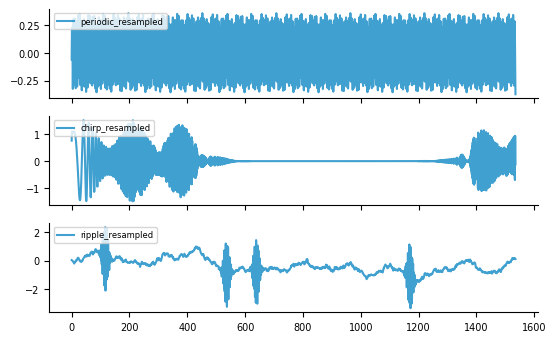

In [4]:
# Resample
TGT_FS = 512

resampled = {}
for k, x in xs.items():
  resampled[f"{k}_resampled"] = mngs.dsp.filt.resample(x, FS, TGT_FS)

# Plots
fig, axes = plt.subplots(nrows=len(resampled), sharex=True)
for (k,x), ax in zip(resampled.items(), axes):
  ax.plot(x[0,0], label=k)
  ax.legend(loc="upper left")
plt.show()

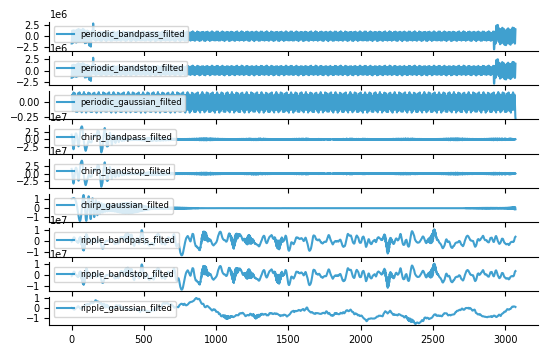

In [5]:
# Filtering
filted = {}
for k, x in xs.items():
  filted[f"{k}_bandpass_filted"] = mngs.dsp.filt.bandpass(x, FS, low_hz=10, high_hz=30)
  filted[f"{k}_bandstop_filted"] = mngs.dsp.filt.bandstop(x, FS, low_hz=10, high_hz=30)
  filted[f"{k}_gaussian_filted"] = mngs.dsp.filt.gauss(x, sigma=3)

# Plots
fig, axes = plt.subplots(nrows=len(filted), sharex=True)
for (k,x), ax in zip(filted.items(), axes):
  ax.plot(x[0,0], label=k)
  ax.legend(loc="upper left")
plt.show()

/usr/local/lib/python3.10/dist-packages/mngs/general/_converters.py:78: UserWarning: Converted from  <class 'numpy.ndarray'> to torch.Tensor (cuda)
  warnings.warn(


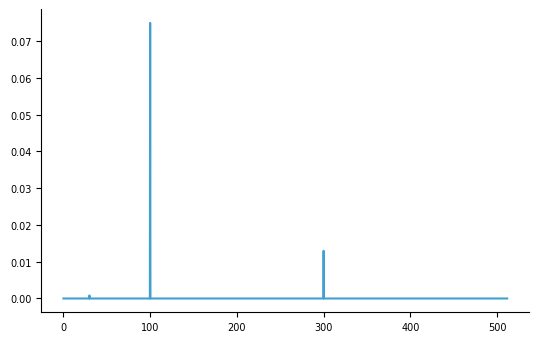

In [6]:
# PSD
x = xs['periodic']
pp, ff = mngs.dsp.psd(x, FS, cuda=True)
plt.plot(ff, pp[0,0])

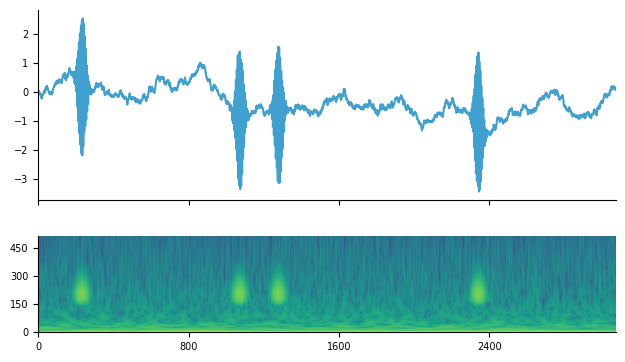

In [7]:
# Wavelet
x = xs["ripple"]
ww, ff = mngs.dsp.wavelet(xs["ripple"], FS, cuda=True)

# Plots
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True)
axes[0].plot(x[0, 0])
axes[1].imshow(ww[0, 0])
axes[1].invert_yaxis()
axes[1] = mngs.plt.ax.set_n_ticks(axes[1], n_xticks=4, n_yticks=4)
plt.tight_layout()
plt.show()